In [36]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [ ]:
df = pd.read_excel('Sprint3.xlsx')

print("Información del dataset:")
print(df.info())

print("\nDatos faltantes por columna:")
print(df.isnull().sum())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212292 entries, 0 to 212291
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           212292 non-null  int64  
 1   send         212292 non-null  int64  
 2   bounce       212292 non-null  int64  
 3   open         212292 non-null  int64  
 4   click        212292 non-null  int64  
 5   Total        212292 non-null  int64  
 6   Comprador    212292 non-null  int64  
 7   hour         212292 non-null  float64
 8   day_of_week  212292 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 14.6 MB
None

Datos faltantes por columna:
Id             0
send           0
bounce         0
open           0
click          0
Total          0
Comprador      0
hour           0
day_of_week    0
dtype: int64


In [ ]:
print("\nPrimeras 5 filas del dataset:")
print(df.head())


Primeras 5 filas del dataset:
        Id  send  bounce  open  click  Total  Comprador       hour  \
0  2044163     4       0     0      0      4          0  17.000000   
1   633731     1       0     0      0      1          0  21.000000   
2  1537126     4       0     0      0      4          0  17.000000   
3  1960135     3       0     0      0      3          0  15.333333   
4  1004992     8       0     1      0     10          1  18.222222   

   day_of_week  total_check  
0     3.500000            4  
1     4.000000            1  
2     3.500000            4  
3     3.333333            3  
4     2.000000            9  


Filas con inconsistencias: 6852
             Id  send  bounce  open  click  Total  Comprador       hour  \
16       892917     1       0     2      0      3          1  21.000000   
36      1836602     1       0     3      0      4          1  18.750000   
47        33937     5       0     1      2      8          1  20.500000   
79        36090     3       0     4      1      8          0  12.250000   
206      602619     2       0     4      0      6          1  15.500000   
...         ...   ...     ...   ...    ...    ...        ...        ...   
212154   365265     3       0    13      0     16          1  16.437500   
212165   196718     4       0     5      0      9          1  18.000000   
212196  1831977     1       0     2      0      3          0  17.333333   
212197  1805663     1       0     2      0      3          1  20.333333   
212246  1066346     1       0     2      0      3          1   8.333333   

        day_of_week  
16         1.333333  
36         0.000000  
4

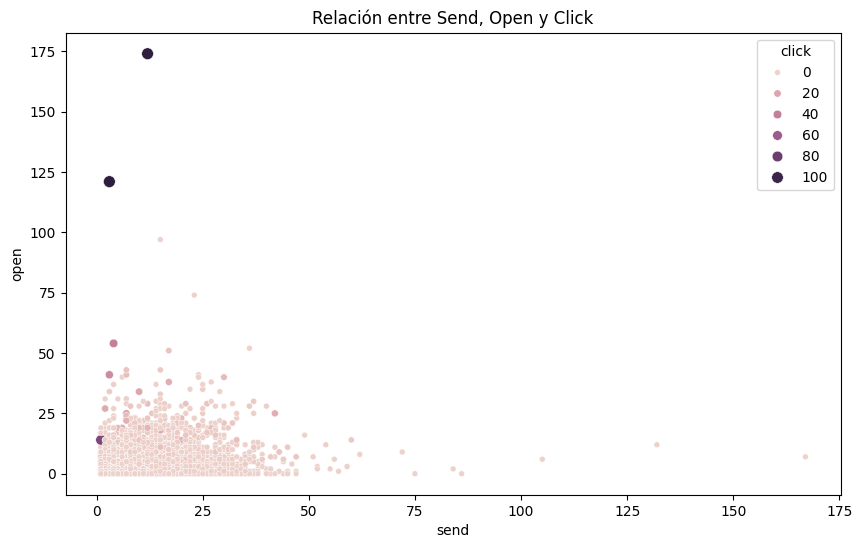

In [ ]:
# Quitar inconsistencias
inconsistencias = df[(df['send'] == 0) & ((df['open'] > 0) | (df['click'] > 0)) |
                     (df['open'] > df['send']) | (df['click'] > df['open'])]

print(f"Filas con inconsistencias: {len(inconsistencias)}")
print(inconsistencias)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='send', y='open', hue='click', size='click')
plt.title('Relación entre Send, Open y Click')
plt.show()

In [22]:
inconsistencias_bounce = df[(df['bounce'] > 0) & ((df['open'] > 0) | (df['click'] > 0))]
print(f"Filas con bounce pero open/click: {len(inconsistencias_bounce)}")



Filas con bounce pero open/click: 751


In [ ]:
df['total_check'] = df['send'] + df['open'] + df['click'] + df['bounce']  
errores_total = df[df['Total'] != df['total_check']]
print(f"Errores en Total: {len(errores_total)}")

Errores en Total: 15283


In [ ]:
df_original = df.copy()

print("Dataset original:", df_original.shape) 

Dataset original: (212292, 10)


In [ ]:
# Filtra las filas sin inconsistencias
df_clean = df[~((df['send'] == 0) & ((df['open'] > 0) | (df['click'] > 0)) |
               (df['open'] > df['send']) | (df['click'] > df['open']))]

print("Filas originales:", len(df))
print("Filas tras limpieza:", len(df_clean))
print("Filas eliminadas:", len(df) - len(df_clean)) 

Filas originales: 212292
Filas tras limpieza: 205440
Filas eliminadas: 6852


In [ ]:

print("Primeras 5 filas del dataset limpio:")
print(df_clean.head())

# inconsistencias
inconsistencias_restantes = df_clean[(df_clean['send'] == 0) & ((df_clean['open'] > 0) | (df_clean['click'] > 0)) |
                                     (df_clean['open'] > df_clean['send']) | (df_clean['click'] > df_clean['open'])]
print("Inconsistencias restantes:", len(inconsistencias_restantes))  

Primeras 5 filas del dataset limpio:
        Id  send  bounce  open  click  Total  Comprador       hour  \
0  2044163     4       0     0      0      4          0  17.000000   
1   633731     1       0     0      0      1          0  21.000000   
2  1537126     4       0     0      0      4          0  17.000000   
3  1960135     3       0     0      0      3          0  15.333333   
4  1004992     8       0     1      0     10          1  18.222222   

   day_of_week  total_check  
0     3.500000            4  
1     4.000000            1  
2     3.500000            4  
3     3.333333            3  
4     2.000000            9  
Inconsistencias restantes: 0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


features = ['send', 'open', 'click', 'Comprador']
X = df_clean[features]

# Normaliza los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


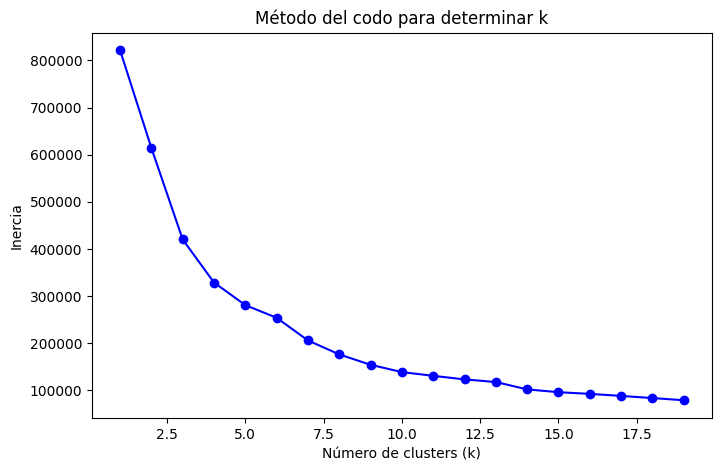

In [ ]:
# Método del codo
inertia = []
k_range = range(1, 20)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k')
plt.show()

In [ ]:

kmeans = KMeans(n_clusters=7, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

print("Distribución de los clusters:")
print(df_clean['Cluster'].value_counts())

Distribución de los clusters:
Cluster
1    104115
0     48815
3     27029
5     14910
4      5834
2      4150
6       587
Name: count, dtype: int64


C:\Users\Quimey\AppData\Local\Temp\ipykernel_3468\3483704323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.fit_predict(X_scaled)


In [49]:
# Medias por cluster
cluster_summary = df_clean.groupby('Cluster')[features].mean()
print("Resumen de los clusters:")
print(cluster_summary)

custom_palette = [
    '#FF0000',  # Rojo
    '#00FF00',  # Verde
    '#0000FF',  # Azul
    '#FFFF00',  # Amarillo
    '#FF00FF',  # Violeta
    '#00FFFF',  # Celeste
    '#FFA500',  # Naranja
]



Resumen de los clusters:
              send      open     click  Comprador
Cluster                                          
0         1.360135  0.063915  0.000000   0.000000
1         2.664265  0.194055  0.000000   1.000000
2         6.826265  2.181205  1.187952   0.744337
3         6.225425  0.180066  0.000000   0.000000
4         9.768255  4.553651  0.033939   0.684779
5        11.359557  0.503823  0.000335   0.938431
6        14.902896  7.502555  3.323680   0.654174


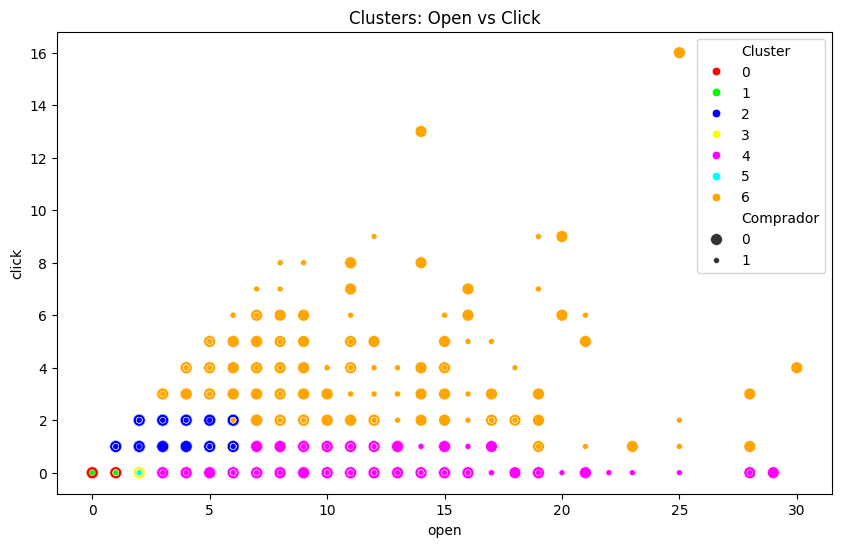

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='open', y='click', hue='Cluster', size='Comprador', data=df_clean, palette=custom_palette)
plt.title('Clusters: Open vs Click')
plt.show()

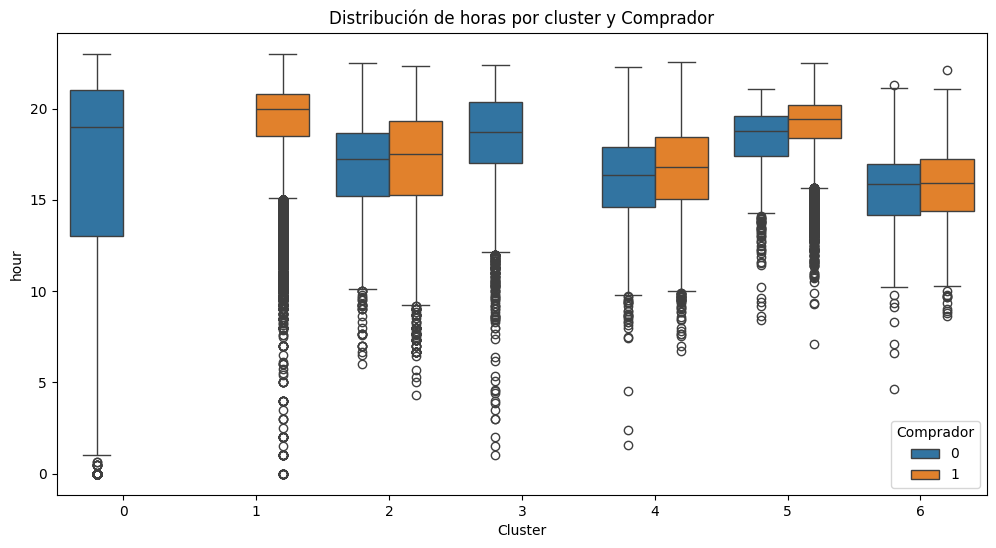

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='hour', hue='Comprador', data=df_clean)
plt.title('Distribución de horas por cluster y Comprador')
plt.show()

C:\Users\Quimey\AppData\Local\Temp\ipykernel_3468\4261267631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['day_of_week_int'] = df_clean['day_of_week'].round().astype(int)


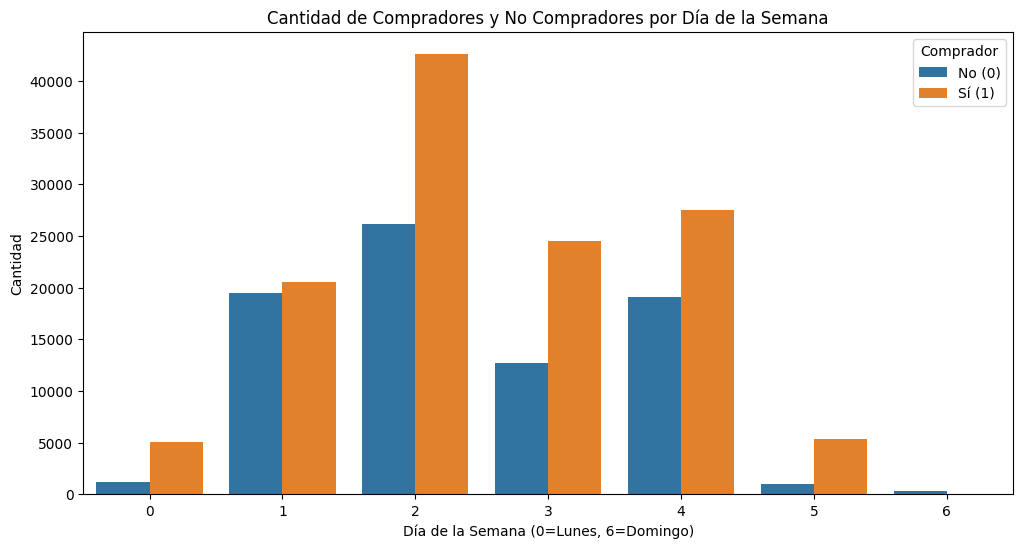

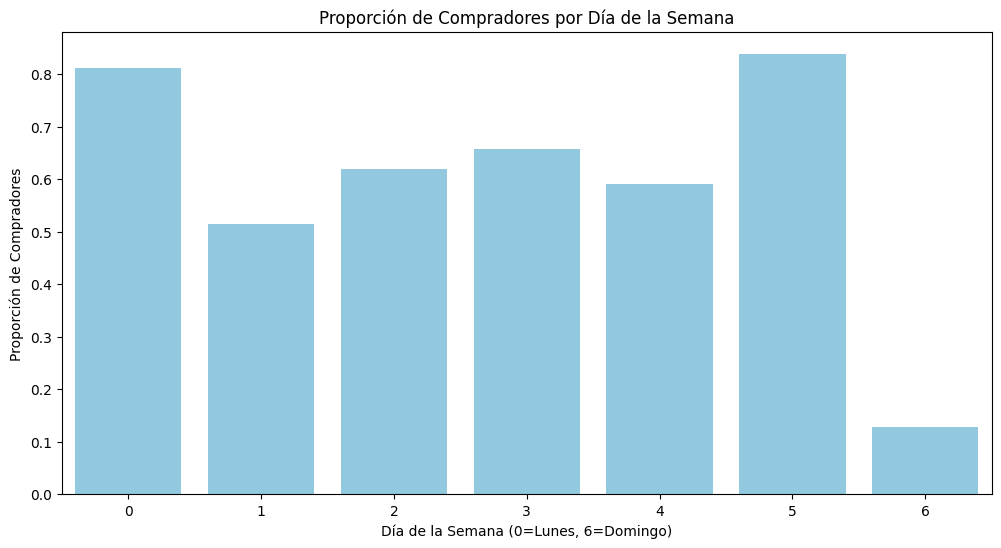

In [ ]:


# Redondear day_of_week a enteros 
df_clean['day_of_week_int'] = df_clean['day_of_week'].round().astype(int)

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week_int', hue='Comprador', data=df_clean)
plt.title('Cantidad de Compradores y No Compradores por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Cantidad')
plt.legend(title='Comprador', labels=['No (0)', 'Sí (1)'])
plt.show()

day_comprador = df_clean.groupby('day_of_week_int')['Comprador'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week_int', y='Comprador', data=day_comprador, color='skyblue')
plt.title('Proporción de Compradores por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Proporción de Compradores')
plt.show()

In [ ]:
# Eliminar filas con bounce 
df_clean_bounce = df_clean[~((df_clean['bounce'] > 0) & ((df_clean['open'] > 0) | (df_clean['click'] > 0)))]

print(f"Filas antes de eliminar bounce: {len(df_clean)}")  
print(f"Filas tras eliminar bounce: {len(df_clean_bounce)}")
print(f"Filas eliminadas por bounce: {len(df_clean) - len(df_clean_bounce)}")  

Filas antes de eliminar bounce: 205440
Filas tras eliminar bounce: 204732
Filas eliminadas por bounce: 708


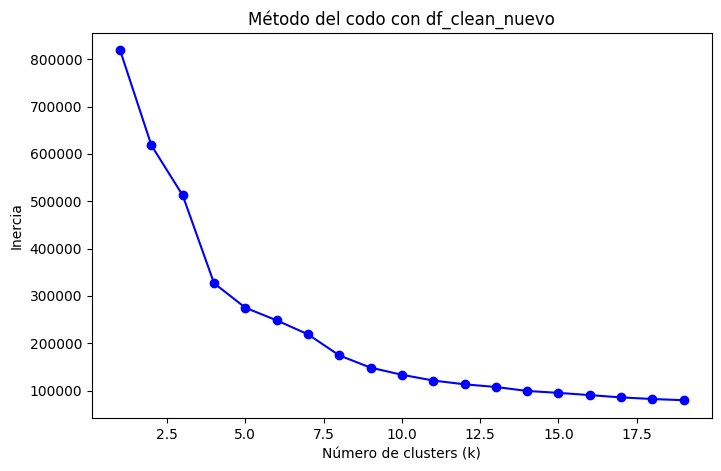

In [35]:

features = ['send', 'open', 'click', 'Comprador']
X = df_clean_bounce[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo con df_clean_nuevo')
plt.show()

In [ ]:
# Features para el clustering
features = ['send', 'open', 'click', 'Comprador']
X = df_clean_bounce[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=7, random_state=42)
df_clean_bounce['Cluster'] = kmeans.fit_predict(X_scaled)

print(df_clean_bounce.groupby('Cluster')[features].mean())

              send      open     click  Comprador
Cluster                                          
0         1.898144  0.182460  0.009825   1.000000
1        17.673971  0.876051  0.056220   0.815626
2        10.596505  5.489828  0.254043   0.687011
3         7.907053  0.450166  0.023420   0.000000
4         2.016824  0.064399  0.002640   0.000000
5        10.873692  4.928251  2.574738   0.685351
6         6.935411  0.494987  0.028527   1.000000


C:\Users\Quimey\AppData\Local\Temp\ipykernel_3468\3680273920.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_bounce['Cluster'] = kmeans.fit_predict(X_scaled)


In [33]:
print(df_clean_bounce['Cluster'].value_counts())

Cluster
0    84983
4    62113
6    32916
3    15030
1     4518
2     3834
5     1338
Name: count, dtype: int64


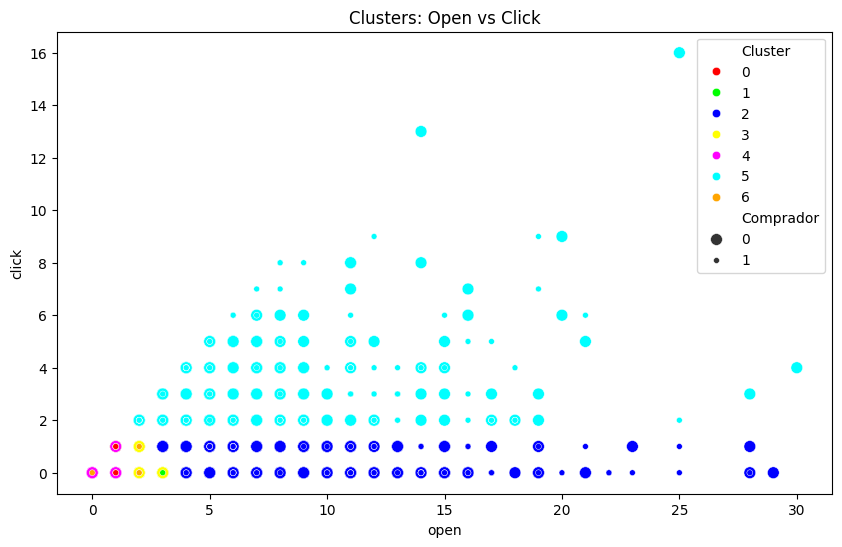

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='open', y='click', hue='Cluster', size='Comprador', data=df_clean_bounce, palette=custom_palette)
plt.title('Clusters: Open vs Click')
plt.show()

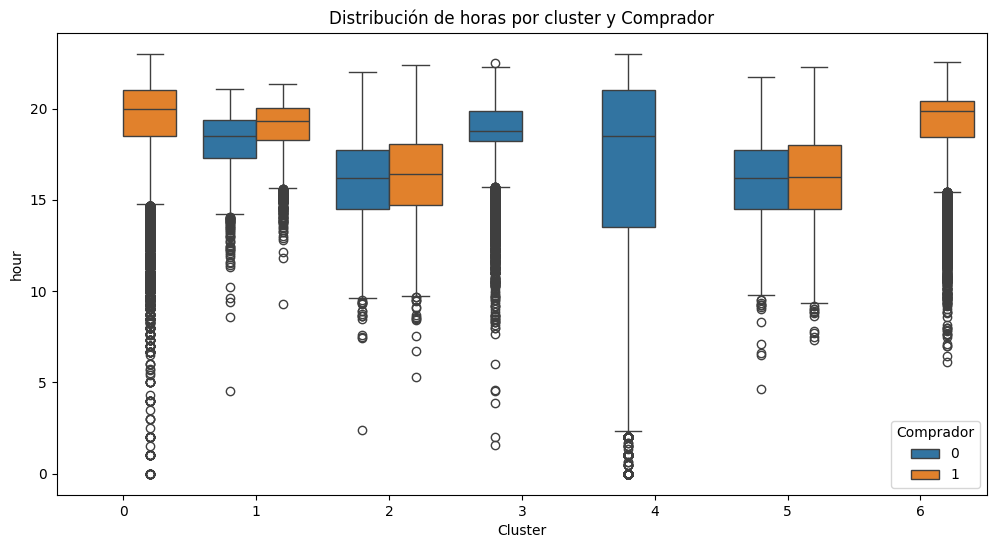

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='hour', hue='Comprador', data=df_clean_bounce)
plt.title('Distribución de horas por cluster y Comprador')
plt.show()

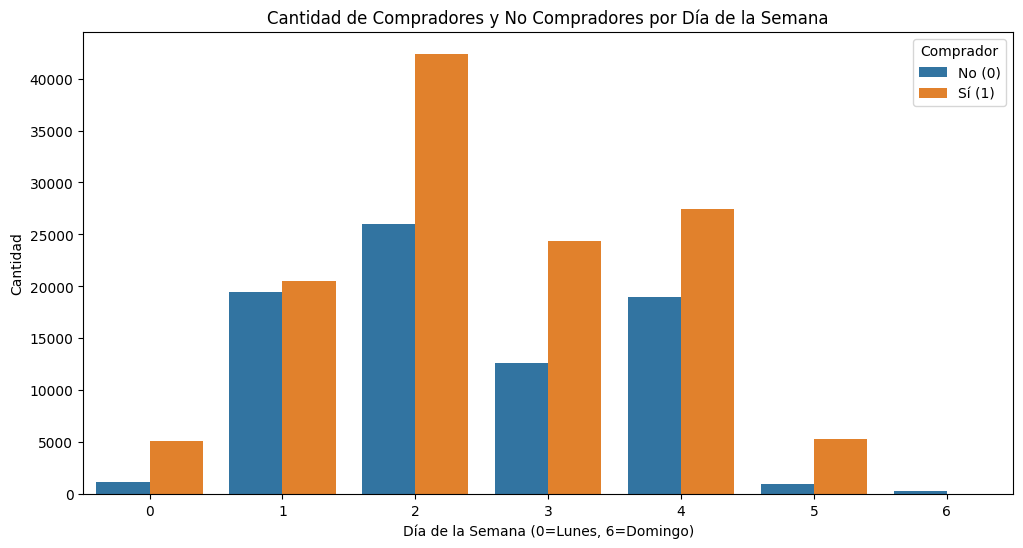

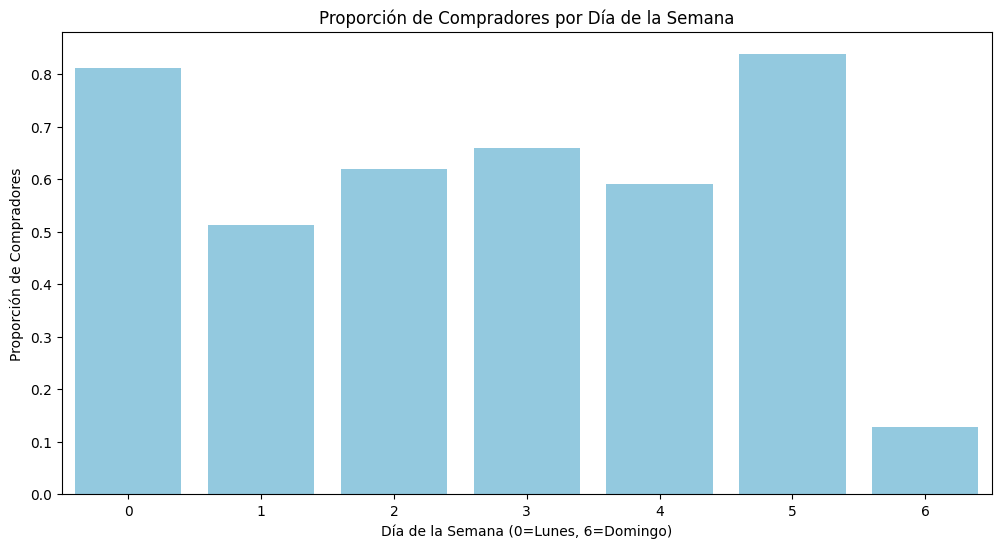

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week_int', hue='Comprador', data=df_clean_bounce)
plt.title('Cantidad de Compradores y No Compradores por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Cantidad')
plt.legend(title='Comprador', labels=['No (0)', 'Sí (1)'])
plt.show()

day_comprador = df_clean_bounce.groupby('day_of_week_int')['Comprador'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week_int', y='Comprador', data=day_comprador, color='skyblue')
plt.title('Proporción de Compradores por Día de la Semana')
plt.xlabel('Día de la Semana (0=Lunes, 6=Domingo)')
plt.ylabel('Proporción de Compradores')
plt.show()

<Figure size 1500x1000 with 0 Axes>

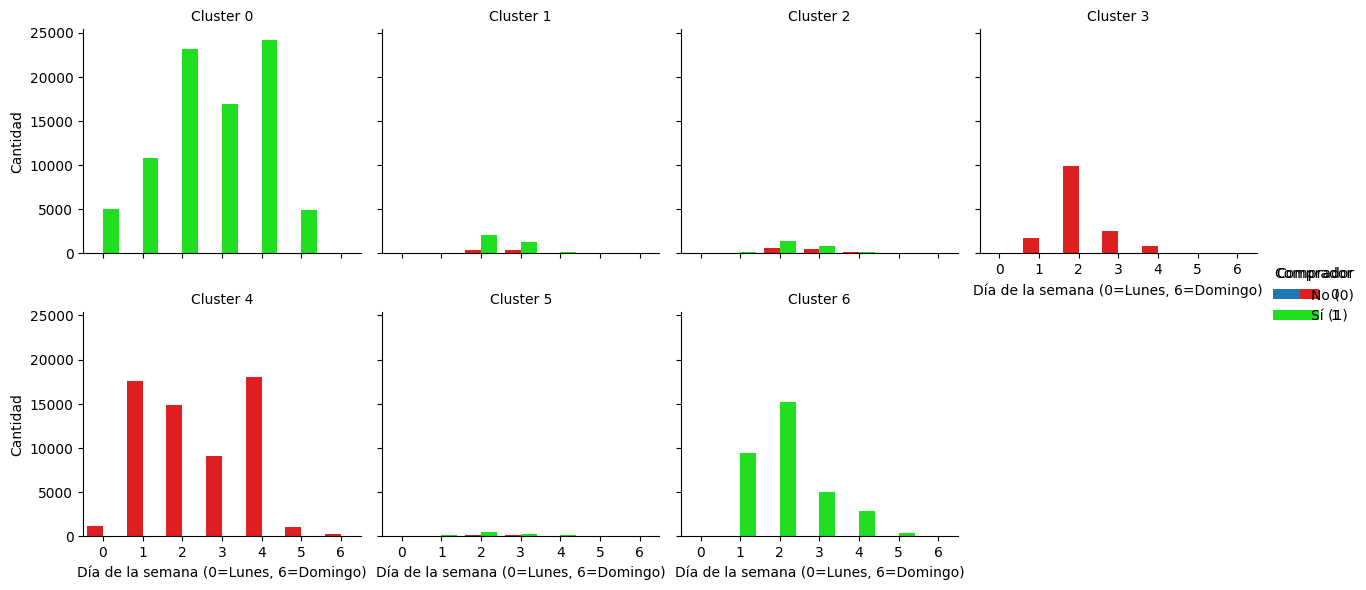

In [ ]:
# Gráfico de barras para cada cluster
plt.figure(figsize=(15, 10))
g = sns.catplot(x='day_of_week_int', hue='Comprador', col='Cluster', col_wrap=4,
                data=df_clean_bounce, kind='count', height=3, aspect=1,
                palette=['#FF0000', '#00FF00'])  
g.set_axis_labels('Día de la semana (0=Lunes, 6=Domingo)', 'Cantidad')
g.set_titles('Cluster {col_name}')
g.add_legend(title='Comprador', labels=['No (0)', 'Sí (1)'])
plt.show()

C:\Users\Quimey\AppData\Local\Temp\ipykernel_3468\1729533896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_bounce['hour_int'] = df_clean_bounce['hour'].round().astype(int)


<Figure size 3000x2500 with 0 Axes>

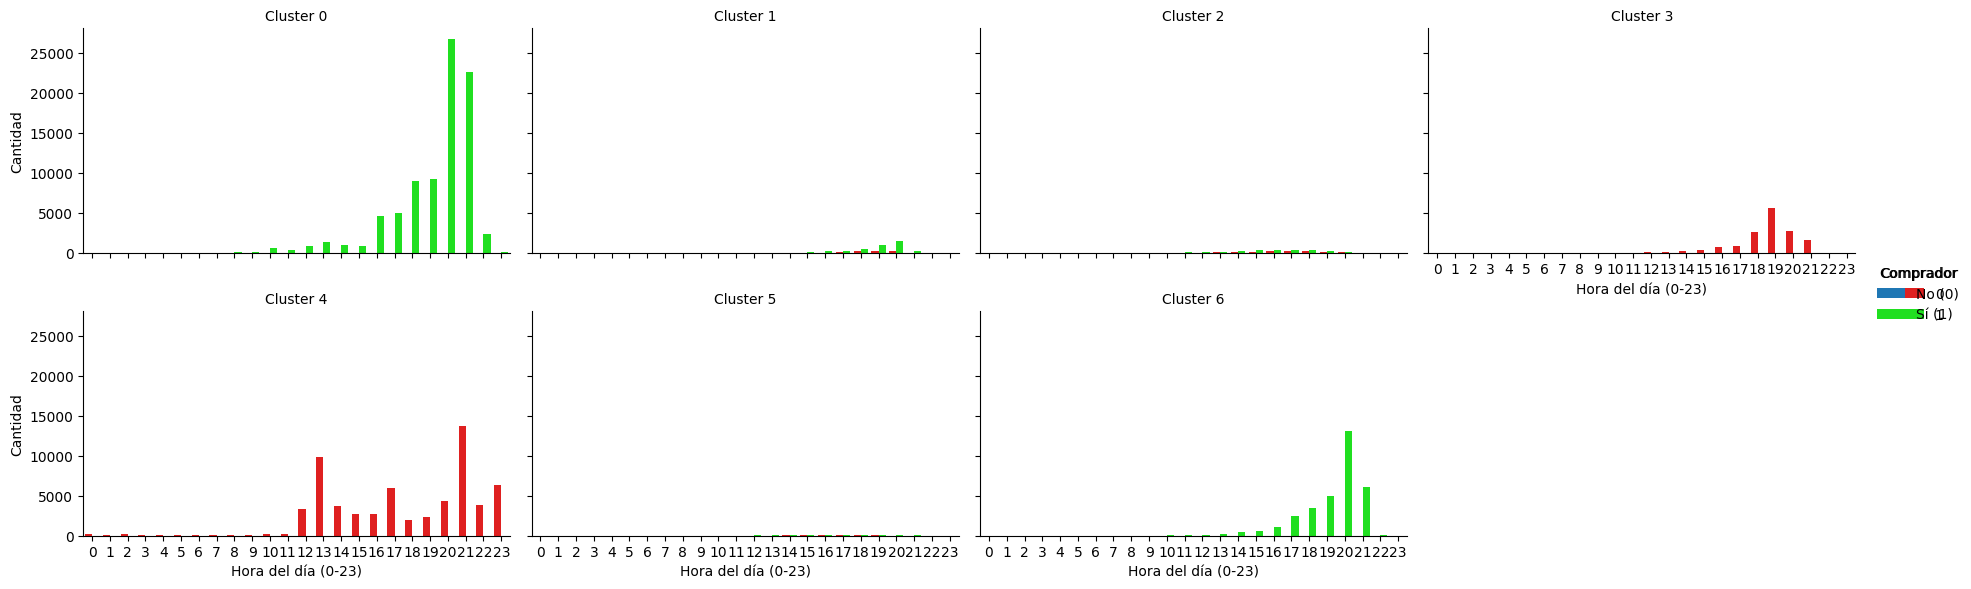

In [48]:

df_clean_bounce['hour_int'] = df_clean_bounce['hour'].round().astype(int)

# Gráfico de barras para cada cluster
plt.figure(figsize=(30, 25))
g = sns.catplot(x='hour_int', hue='Comprador', col='Cluster', col_wrap=4,
                data=df_clean_bounce, kind='count', height=3, aspect=1.5,
                palette=['#FF0000', '#00FF00'])  
g.set_axis_labels('Hora del día (0-23)', 'Cantidad')
g.set_titles('Cluster {col_name}')
g.add_legend(title='Comprador', labels=['No (0)', 'Sí (1)'])
plt.show()

CONCLUSIONES DEL PROYECTO:

Clusters y sus características
Cluster 0: Pasivos Compradores
Medias:
send: 1.90   open: 0.18     click: 0.01   Comprador: 1.00    Tamaño: 84,983 (41.5% del dataset)

Descripción: Este es el grupo más grande y representa clientes muy pasivos pero efectivos. Reciben pocos correos (promedio de 2), apenas los abren (18% de apertura), y casi no hacen clics. Sin embargo, siempre compran. Podrían ser clientes que ya están fidelizados o que compran por otros canales, y el correo solo actúa como un recordatorio sutil.

Que estrategia se podria aplicar? Para este cluster en partiular se podria enfocar otro tipo de campaña de marketing via mail ya que son compradores pero no les interesa recibir mails, por lo tanto cambiar la estructura del mail para que les llame mas la atencion u ofrecer algun beneficio si compran mediante esa via.

Dias y horarios para enviar mails: Miercoles y Viernes, entre las 20:00hs y 22:00hs, siendo las 20:00hs el horario optimo.

Cluster 1: Sobreexpuestos Compradores
Medias:
send: 17.67   open: 0.88 (baja tasa de apertura relativa)    click: 0.06    Comprador: 0.82     Tamaño: 4,518 (2.2%)

Descripción: Clientes sobreexpuestos a correos (casi 18 envíos promedio), pero con poca interacción. Aun así, tienen una alta tasa de compra (82%). Podrían estar saturados por la cantidad de correos, pero siguen siendo rentables. Este grupo pequeño podría beneficiarse de menos envíos más enfocados.

Que estrategia se podria aplicar? Para este cluster en partiular tiene un segmento valioso porque la mayoria de los clientes compra pero pocos abren los mails, se podria reducir la cantidad de mails enviados y que estos sean mas personalizados.

Dias y horarios para enviar mails: Miercoles y Jueves, entre las 18:00hs y 21:00hs, siendo las 20:00hs el horario optimo.

Cluster 2: Apertura Alta con Pocos Clics
Medias:
send: 10.60    open: 5.49     click: 0.25      Comprador: 0.69 (69% compran)      Tamaño: 3,834 (1.9%)

Descripción: Clientes interesados pero no clicadores. Reciben bastantes correos (11), los abren mucho (52% de apertura), pero rara vez hacen clic. Su tasa de compra (69%) sugiere que el contenido del correo los motiva a comprar sin necesidad de interactuar con enlaces.

Que estrategia se podria aplicar? Para este cluster en partiular tiene un segmento donde esta interesado en ver lo que ofrecen, habria que personalizar los mails, como por ejemplo ofertas o descuentos exclusivos para motivarlos a entrar a comprar desde el enlace del mail.

Dias y horarios para enviar mails: Miercoles y Jueves, entre las 14:00hs y 19:00hs.

Cluster 3: Moderados No Compradores
Medias:
send: 7.91       open: 0.45       click: 0.02      Comprador: 0.00      Tamaño: 15,030 (7.3%)

Descripción: Clientes moderadamente expuestos pero desinteresados. Reciben unos 8 correos, pero apenas los abren y no hacen clics ni compran.

Que estrategia se podria aplicar? Para este cluster en partiular tiene un segmento de clientes desinteresados por el producto, se podria probar con una nueva campaña de marketing para intentar generar interes en este segmento de clientes.

Dias y horarios para enviar mails: Miercoles, entre las 18:00hs y 21:00hs, siendo las 19:00hs el horario optimo.

Cluster 4: Pasivos No Compradores
Medias:
send: 2.02    open: 0.06     click: 0.00      Comprador: 0.00     Tamaño: 62,113 (30.3%)

Descripción: Segundo grupo más grande, son clientes totalmente pasivos y no rentables. Reciben pocos correos, casi no los abren, y nunca compran.

Que estrategia se podria aplicar? Para este cluster en partiular tiene un segmento de desinteres total, pueden ser personas que no confian en la publicidad via mail (ejemplo enlaces con estafas o virus) por lo tanto ni siquiera abren los mail o ser mails inactivos, es un segmento que se podria pobrar con una nueva estrategia de marketing a ver si aparece algo de interes o descartarlos totalmente.

Dias y horarios para enviar mails: Martes, Miercoles y Viernes, entre las 12:00hs y 23:00hs, siendo las 21:00hs el horario optimo.

Cluster 5: Activos con Clics
Medias:
send: 10.87       open: 4.93       click: 2.57      Comprador: 0.69      Tamaño: 1,338 (0.7%)

Descripción: Clientes muy activos y valiosos, aunque pocos. Reciben 11 correos, los abren mucho, y hacen clics con frecuencia. El 69% compra, lo que los hace un grupo clave.

Que estrategia se podria aplicar? Para este cluster en partiular tiene un segmento muy valioso de clientes ya que tienen mucha activida via mail, se los puede premiar con alguna campaña premium o alguna beneficio por su fidelidad. Tambien se podrian probar nuevas estrategias de marketing ya que son un grupo muy interactivo.

Dias y horarios para enviar mails: Miercoles y Jueves, entre las 12:00hs y 21:00hs.


Cluster 6: Moderados Compradores
Medias:
send: 6.94    open: 0.49     click: 0.03      Comprador: 1.00        Tamaño: 32,916 (16.1%)

Descripción: Clientes moderados pero efectivos. Reciben 7 correos, los abren poco, y casi no hacen clics, pero siempre compran. Este grupo grande podría estar comprando por lealtad, y los correos funcionan como refuerzo.

Que estrategia se podria aplicar? Para este cluster en partiular tiene un segmento de clientes para mantenerlo, y para que tengan mas interaccion se podria ofrecer ofertas o descuentos exclusivos ingresando por el enlace del mail, mantener la cantidad de envios ya que si no ingresan por ese medio les sirve de recordatoria y compran igual por otro canal.

Dias y horarios para enviar mails: Martes y Miercoles, entre las 17:00hs y 21:00hs, siendo las 20:00hs el horario optimo.


In [ ]:

features = ['send', 'open', 'click', 'Comprador']
X = df_clean_bounce[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df_clean_bounce['Cluster'] = kmeans.fit_predict(X_scaled)

print("Medias de los clusters:")
print(df_clean_bounce.groupby('Cluster')[features].mean())
print("\nTamaño de los clusters:")
print(df_clean_bounce['Cluster'].value_counts())
print("\nInercia del modelo:", kmeans.inertia_)

Medias de los clusters:
              send      open     click  Comprador
Cluster                                          
0         2.718641  0.213646  0.010158   1.000000
1         9.417303  4.202102  0.247680   0.697052
2        10.914925  4.960448  2.572388   0.685075
3        10.808721  0.352327  0.016114   0.594084
4         2.394098  0.094174  0.004017   0.000000

Tamaño de los clusters:
Cluster
0    106316
4     68214
3     21534
1      7328
2      1340
Name: count, dtype: int64

Inercia del modelo: 274982.3148415971


C:\Users\Quimey\AppData\Local\Temp\ipykernel_3468\920279189.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_bounce['Cluster'] = kmeans.fit_predict(X_scaled)
